# Machine learning Capstone project


<img src="Udacity_logo.png">

# Project overview

The aim of the project is to predict the grasp quality of a robotic hand given the data captured during a series of experiments using Smart Grasping Sandbox (SGS).
The data generated from the simulated experiment among many headers contains information about hand, finger, joint position and velocity which will be the primary key information I will be using to predict the next grasp.

# Problem statement

How to predict the grasp of an object before perfoming an action
Which mean how to position the robotic hand in space in such way that when the grasping of that particular object is necessary then it is done correctly.


## Metrics

Good grasp occurs when the robot hand successfully grabs the red ball and does not drop it otherwise, it will be considered a bad grasp.

Total amount of time the robot performs successfully the action corresponds with the total number of experiments performed. 

The ration of Good graps over the total number of experiments is shown in the picture below. Same applies for the bad grasp.

## Analysis
### Criteria
Criteria of analysis will be done based on the highest accuracy score.
From the results yielded we can see that .... NN shows a % of XX compared to
.... NN which shows a % of %


## Benchmark

As a benchmark for my model I will use the highest % score that will be generated from my initial NN which will get compared with the results that will be yielded with another framework.


# Explore the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# import the dataset
csv_file = 'dataset/shadow_robot_dataset.csv'
df = pd.read_csv(csv_file)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992641 entries, 0 to 992640
Data columns (total 30 columns):
experiment_number      992641 non-null object
 robustness            992641 non-null float64
 H1_F1J2_pos           992641 non-null float64
 H1_F1J2_vel           992641 non-null float64
 H1_F1J2_eff           992641 non-null float64
 H1_F1J3_pos           992641 non-null float64
 H1_F1J3_vel           992641 non-null float64
 H1_F1J3_eff           992641 non-null float64
 H1_F1J1_pos           992641 non-null float64
 H1_F1J1_vel           992641 non-null float64
 H1_F1J1_eff           992641 non-null float64
 H1_F3J1_pos           992641 non-null float64
 H1_F3J1_vel           992641 non-null float64
 H1_F3J1_eff           992641 non-null float64
 H1_F3J2_pos           992641 non-null float64
 H1_F3J2_vel           992641 non-null float64
 H1_F3J2_eff           992641 non-null float64
 H1_F3J3_pos           992641 non-null float64
 H1_F3J3_vel           992641 non-null float

In [10]:
df.head(3)

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
0,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.118209,6.838743,1.454113,0.302276,-18.738705,0.0,-0.032352,0.127232,...,0.109246,0.042166,0.041517,0.439459,-13.975613,0.0,0.177114,5.456443,1.493776,0
1,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.152945,5.997176,1.098305,0.308893,-14.173090,0.0,-0.027381,0.273711,...,0.105656,-0.130178,0.075700,0.446421,-17.618561,0.0,0.176817,5.130892,1.493497,1
2,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.162168,5.302321,0.999142,0.314331,-13.093510,0.0,-0.025808,0.184343,...,0.103620,-0.162815,0.095730,0.439690,-13.031110,0.0,0.174343,5.650662,1.523433,2


In [11]:
df.tail(3)

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
992638,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.130326,7.749944,1.850211,0.251145,-21.228001,0.000000,-0.027532,-0.020924,...,-0.064897,0.035043,0.011649,0.371388,-5.145467,0.000000,0.205514,2.087309,0.458245,27
992639,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.149129,6.136092,1.646002,0.259715,-17.988816,0.000000,-0.024531,0.080302,...,-0.067001,0.041980,0.032763,0.371682,-5.562895,0.000000,0.205412,2.323993,0.461640,28
992640,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.109327,-7.797566,0.000000,0.256289,19.186920,0.761764,-0.021199,0.187938,...,-0.063383,0.079873,-0.003048,0.379547,5.288929,0.129144,0.221894,-1.628677,0.000000,29


In [5]:
csv_file = 'dataset/shadow_robot_dataset.csv'
# either use header = 0 or don’t use any header argument.
df = pd.read_csv(csv_file, header = 0)


In [2]:
# header = 1 means consider second line of the dataset as header.
df = pd.read_csv(csv_file, header = 1)


# Explore dataset



### Class distributions

In [31]:
# locating important parameters iloc[column, rows]
training = df.iloc[1:10]
training.head()

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
1,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.152945,5.997176,1.098305,0.308893,-14.173090,0.0,-0.027381,0.273711,...,0.105656,-0.130178,0.075700,0.446421,-17.618561,0.0,0.176817,5.130892,1.493497,1
2,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.162168,5.302321,0.999142,0.314331,-13.093510,0.0,-0.025808,0.184343,...,0.103620,-0.162815,0.095730,0.439690,-13.031110,0.0,0.174343,5.650662,1.523433,2
3,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.137684,6.504519,1.256002,0.304333,-16.948796,0.0,-0.027398,0.121100,...,0.106332,-0.186364,0.068382,0.445833,-11.763374,0.0,0.180723,5.267410,1.455800,3
4,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.161747,4.899113,0.999313,0.315815,-13.700695,0.0,-0.025698,0.079876,...,0.104104,-0.216307,0.090358,0.438578,-15.347191,0.0,0.164628,6.339569,1.627478,4
5,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.142037,6.244418,1.209869,0.306419,-16.266108,0.0,-0.027343,0.144840,...,0.105687,-0.166225,0.075026,0.442759,-13.477787,0.0,0.176201,5.781911,1.506166,5


In [6]:
df.tail(10)

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
992631,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.125458,7.590437,1.897293,0.251336,-20.584301,0.000000,-0.028187,0.016215,...,-0.063555,-0.017697,-0.002304,0.372126,-4.642603,0.000000,0.208041,1.889879,0.431011,20
992632,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.127350,7.135461,1.873800,0.254291,-18.860431,0.000000,-0.027845,0.031700,...,-0.064275,-0.031236,0.004764,0.371796,-5.252718,0.000000,0.207601,2.209818,0.438603,21
992633,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.132881,6.857425,1.815702,0.256093,-19.040201,0.000000,-0.027372,0.027302,...,-0.065521,0.034403,0.017878,0.373136,-5.203855,0.000000,0.206951,2.157384,0.444583,22
992634,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.131513,6.966961,1.830468,0.252527,-19.167209,0.000000,-0.026947,-0.019985,...,-0.064968,0.077494,0.012780,0.372523,-5.010247,0.000000,0.205460,2.024550,0.458159,23
992635,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.129801,7.335149,1.851264,0.252165,-20.034763,0.000000,-0.028068,0.044246,...,-0.064540,-0.019866,0.007529,0.372625,-4.842305,0.000000,0.208904,2.008012,0.423553,24
992636,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.130388,7.184142,1.843887,0.253100,-19.537161,0.000000,-0.027824,0.050854,...,-0.064553,-0.044033,0.007415,0.373140,-4.915019,0.000000,0.209603,2.067703,0.417153,25
992637,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.128054,7.520762,1.870689,0.251921,-20.113798,0.000000,-0.028146,0.034234,...,-0.064192,-0.006108,0.004178,0.372934,-4.841139,0.000000,0.207827,1.989526,0.434158,26
992638,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.130326,7.749944,1.850211,0.251145,-21.228001,0.000000,-0.027532,-0.020924,...,-0.064897,0.035043,0.011649,0.371388,-5.145467,0.000000,0.205514,2.087309,0.458245,27
992639,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.149129,6.136092,1.646002,0.259715,-17.988816,0.000000,-0.024531,0.080302,...,-0.067001,0.041980,0.032763,0.371682,-5.562895,0.000000,0.205412,2.323993,0.461640,28
992640,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.109327,-7.797566,0.000000,0.256289,19.186920,0.761764,-0.021199,0.187938,...,-0.063383,0.079873,-0.003048,0.379547,5.288929,0.129144,0.221894,-1.628677,0.000000,29


# Exploratory visualization

Plot the data from the dataset


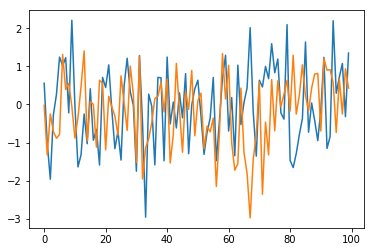

In [27]:
import pandas
import matplotlib.pyplot as plt
# dataset = pandas.read_csv('dataset/shadow_robot_dataset.csv', usecols=[1], engine='python')
plt.plot(df)
plt.show()



## Algorithms and Techniques

To implement the ... NN I will use the common technique of splitting the test and train set... 

X_test, X_train, Y_test, Y_train 

the above will get fed to the NN.


# Keras & Sklearn

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
from keras.layers import *
import numpy

from sklearn.model_selection import train_test_split

# Ignore the first row and column
dataset = numpy.loadtxt("dataset/shadow_robot_dataset.csv", skiprows = 1, usecols = range(1, 30), delimiter = ",")

Since my output vector expected is the grasp robustness. I will read the header of my CSV file and then collect and store those values into a list.
The list will get converted to numpy array which will serve for the output vector containing the predicted grasp robustness.

In [26]:
# csv_file = 'dataset/shadow_robot_dataset.csv'
# df = pd.read_csv(csv_file)

# Getting the header

with open('dataset/shadow_robot_dataset.csv', 'r') as f:
    header = f.readline()
# remove whitespace characters    
header = header.strip("\n").split(',')
header
header = [i.strip(" ") for i in header]

# use velocity and effort
saved_cols = []
for index, col in enumerate(header[1:]):
    if ("vel" in col) or ("eff" in col):
        saved_cols.append(index)
        
new_X = []
for x in dataset:
    new_X.append([x[i] for i in saved_cols])
   
# X - split of the dataset
X = numpy.array(new_X)

In [1]:
import pandas as pd
csv_file = 'dataset/shadow_robot_dataset.csv'
df = pd.read_csv(csv_file)



In [9]:
# Now let's split the test and train set
Y = dataset [:, 0]

In [10]:
# Provide a random seed
rnd_seed = 6

# dataset split
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size = 0.30, random_state = rnd_seed)

# Good grasp threshold for stability

good_grasp = 50

# Store good and best grasp results
itemindex = numpy.where(Y_test > 1.05 * good_grasp)

best_grasps = X_test[itemindex[0]]

itemindex = numpy.where(Y_test <= 0.95 * good_grasp)

bad_grasps = X_test[itemindex[0]]


# splitting the grasp quality for stable or unstable grasps
Y_train = numpy.array([int(i > good_grasp) for i in Y_train])
Y_train = numpy.reshape(Y_train, (Y_train.shape[0],))

Y_test = numpy.array([int(i > good_grasp) for i in Y_test])
Y_test = numpy.reshape(Y_test, (Y_test.shape[0],))

# Building the model


In [11]:
# building the model
model = Sequential()

model.add(Dense(20*len(X[0]), use_bias = True, input_dim = len(X[0]), activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Training the model

In [24]:
model.fit(X_train, Y_train, validation_split = 0.20, epochs = 50,
          batch_size = 500000)

Train on 238234 samples, validate on 59559 samples
Epoch 1/50
238234/238234 [==============================] - 2s 10us/step - loss: 0.8887 - acc: 0.5071 - val_loss: 0.5260 - val_acc: 0.6148
Epoch 2/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.7531 - acc: 0.4583 - val_loss: 0.4369 - val_acc: 0.6135
Epoch 3/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.6271 - acc: 0.5157 - val_loss: 0.3850 - val_acc: 0.6398
Epoch 4/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.5336 - acc: 0.5618 - val_loss: 0.3585 - val_acc: 0.6530
Epoch 5/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.4704 - acc: 0.5933 - val_loss: 0.3470 - val_acc: 0.6526
Epoch 6/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.4284 - acc: 0.6156 - val_loss: 0.3437 - val_acc: 0.6525
Epoch 7/50
238234/238234 [==============================] - 0s 1us/step - loss: 0.4024 - acc: 0.6692 - val_loss: 0.3447 

In [25]:
# I will save the trained model trained with Keral library for later use
import h5py
model.save("./keras_model.h5")

In [27]:
# evaluating the model
score = model.evaluate(X_test, Y_test)

print("%s : %.3f%%" % (model.metrics_names[1], score[1]*100))

694848/694848 [==============================] - 35s 50us/step
acc : 97.137%


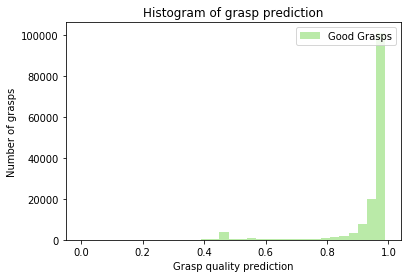

In [29]:
# plotting predictions 
predictions = model.predict(best_grasps)

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(predictions,
         color='#77D653',
         alpha=0.5,
         label='Good Grasps',
         bins=np.arange(0.0, 1.0, 0.03))

plt.title('Histogram of grasp prediction')
plt.ylabel('Number of grasps')
plt.xlabel('Grasp quality prediction')
plt.legend(loc='upper right')

plt.show()

From the graph above it can bee seen that most of the grasps are correctly predicted as stable <0.8


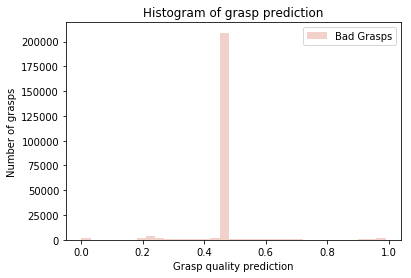

In [30]:
# What about plotting the unstable grasps?
# Unstable grasps
predictions_bad_grasp = model.predict(bad_grasps)


# Plot a histogram of defender size
plt.hist(predictions_bad_grasp,
         color = '#D66751',
         alpha = 0.3,
         label = 'Bad Grasps',
         bins = np.arange(0.0, 1.0, 0.03))

plt.title('Histogram of grasp prediction')
plt.ylabel('Number of grasps')
plt.xlabel('Grasp quality prediction')
plt.legend(loc='upper right')

plt.show()

## Results
### Model evaluation and validation
After evaluating the model the prediction accuracy is fairly high 0.97 thus the number of good and bad grasps is close to the confident values obtained from the dataset. 



### References
```
[1] Carlos Rubert, Daniel Kappler, Jeannette Bohg and Antonio Morales: Grasp success prediction with quality metrics 
[2] Jialiang (Alan) Zhao, Jacky Liang, and Oliver Kroemer: Towards Precise Robotic Grasping by Probabilistic Post-grasp Displacement Estimation
[3] Alex Keith Goins: thesis work
[4] https://www.kaggle.com/ugocupcic/grasp-quality-prediction/
[5] 
[6] Shadow robot – Building a sandbox for hand-robot training
[7] Google developers – Common ML problems

```